<a href="https://colab.research.google.com/github/shaanvithabandewar/data_science_assignmets/blob/main/assignment_navies_bayes_test_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Task 1: Data Exploration and Preprocessing
data = pd.read_csv('blogs.csv')

In [ ]:
data.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [ ]:
data.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [ ]:
data.isnull().sum()

,0
Data,0
Labels,0


In [ ]:
#Import the NLTK library
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
print(stop_words)

{'ma', "wouldn't", 've', 'she', 'or', "didn't", 'yours', "wasn't", 'were', 'hers', 'such', "doesn't", 'won', 'during', 'being', 'do', 'now', "she's", 'few', 's', "you're", 'because', 'was', 'the', 'through', 'no', 'more', 'then', 'you', "you'd", 'for', 'out', 'wouldn', 'll', 'ours', 'themselves', 'these', "you've", 'this', 'why', 'will', 'about', 'whom', 'before', 'shouldn', 'shan', 'that', 'our', "hasn't", 'doesn', 'me', 'each', 'which', 'couldn', "weren't", 'so', 'has', 'been', 'under', 'hasn', 'herself', 'yourself', 'doing', 'into', 'i', 'in', "isn't", 'mustn', 'haven', 'once', 'what', "it's", 'those', 'y', "won't", 'when', 'and', "mustn't", 'my', "haven't", 'having', 'how', 'can', 'don', 'too', 'some', 'both', 'does', 'wasn', 'had', 'nor', 'they', 'theirs', 'very', "aren't", 'if', 'is', 't', 'below', 'needn', "shouldn't", 'them', 'as', 'it', 'with', 'am', 'mightn', 'on', "hadn't", 'at', 're', 'he', 'her', 'until', 'hadn', "needn't", 'off', 'while', 'myself', 'its', 'to', 'than', 'i

In [ ]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return ' '.join(tokens)

In [ ]:
data['Data'] = data['Data'].apply(preprocess_text)
data

,Data,Labels
0,path agate uknet mcsun frank frank frank newsg...,alt.atheism
1,newsgroups path constellation darkside bil bil...,alt.atheism
2,path uunet olivea decwrl jimh jimh james hogan...,alt.atheism
3,path usc venice jbrown jbrown newsgroups subje...,alt.atheism
4,xref newsgroups path rphroy caen uunet pipex u...,alt.atheism
...,...,...
1995,xref path agate uknet mcsun frank frank frank ...,talk.religion.misc
1996,xref newsgroups path rochester udel purdue mec...,talk.religion.misc
1997,xref path gatech purdue scharle scharle scharl...,talk.religion.misc
1998,xref path udel psinntp foster foster newsgroup...,talk.religion.misc


In [ ]:
# Task 2: Naive Bayes Model for Text Classification
X = data['Data']
y = data['Labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred = nb.predict(X_test_tfidf)
y_pred

array(['talk.politics.misc', 'comp.sys.ibm.pc.hardware', 'sci.med',
       'rec.sport.baseball', 'sci.electronics', 'sci.electronics',
       'rec.sport.baseball', 'talk.politics.mideast', 'alt.atheism',
       'sci.med', 'alt.atheism', 'sci.med', 'sci.crypt',
       'rec.sport.baseball', 'comp.sys.ibm.pc.hardware',
       'comp.os.ms-windows.misc', 'rec.autos', 'comp.graphics',
       'talk.politics.guns', 'talk.politics.misc',
       'comp.sys.mac.hardware', 'alt.atheism', 'alt.atheism',
       'rec.sport.hockey', 'alt.atheism', 'sci.crypt',
       'talk.politics.misc', 'rec.sport.baseball', 'rec.autos',
       'alt.atheism', 'rec.sport.baseball', 'rec.sport.hockey',
       'comp.os.ms-windows.misc', 'rec.sport.baseball',
       'rec.sport.hockey', 'comp.sys.mac.hardware', 'sci.med',
       'misc.forsale', 'rec.sport.hockey', 'comp.os.ms-windows.misc',
       'sci.electronics', 'soc.religion.christian',
       'comp.os.ms-windows.misc', 'comp.graphics',
       'soc.religion.christian

In [ ]:
# Task 3: Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'


In [ ]:
data['Sentiment'] = data['Data'].apply(get_sentiment)
print(data['Sentiment'])

0       Positive
1       Negative
2       Positive
3       Positive
4       Positive
          ...   
1995    Positive
1996    Positive
1997    Positive
1998    Positive
1999    Positive
Name: Sentiment, Length: 2000, dtype: object


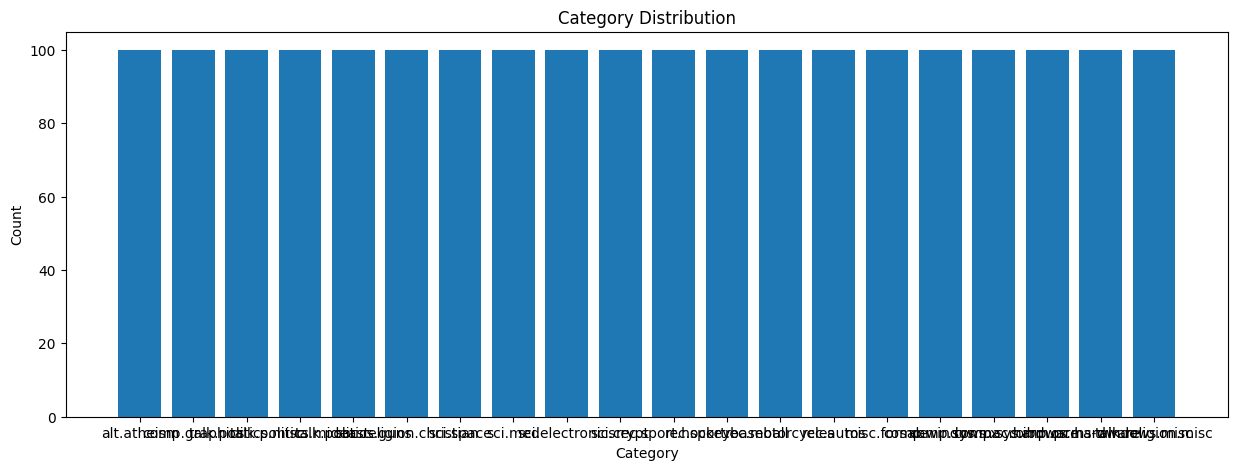

In [ ]:
# Visualizations
plt.figure(figsize=(15, 5))
plt.bar(data['Labels'].value_counts().index, data['Labels'].value_counts())
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

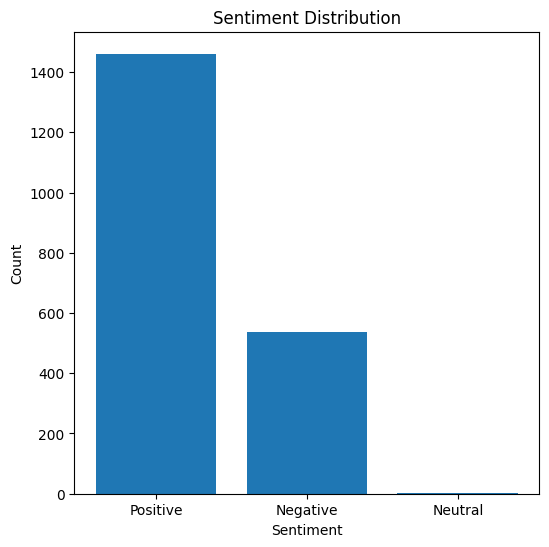

In [ ]:
plt.figure(figsize=(6, 6))
plt.bar(data['Sentiment'].value_counts().index, data['Sentiment'].value_counts())
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

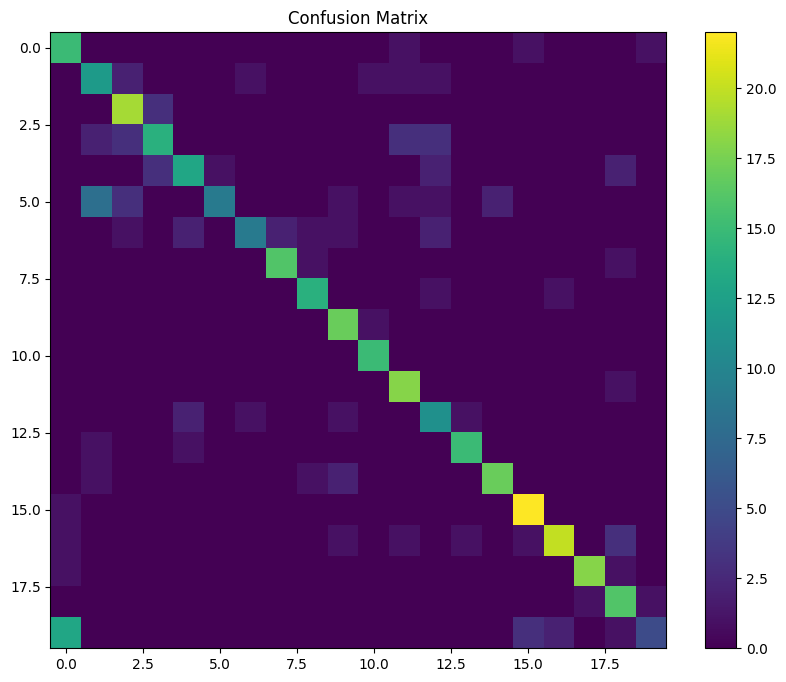

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()

In [ ]:
print(data['Sentiment'].value_counts())

Sentiment
Positive    1461
Negative     536
Neutral        3
Name: count, dtype: int64


In [ ]:
# Task 4: Evaluation
print('Naive Bayes Classification Model:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1-score:', f1_score(y_test, y_pred, average='weighted'))

Naive Bayes Classification Model:
Accuracy: 0.7375
Precision: 0.7619937980765122
Recall: 0.7375
F1-score: 0.7247122416353601
